# Endangered Birds and Fish Lab Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
sns.set()
%matplotlib inline

# Questions which we want to answer:
##### - How has the population of endangered birds and fish has evolved over time and what are the current numbers in different regions?
##### - Which geographical, natural and environmental characteristics predict a higherpercentage of endangered birds and fish in a country?
##### - 

Let's start with the first Question.

# Question 1: How has the population of endangered birds and fish has evolved over time and what are the current numbers in different regions?

We will divide this questions in two parts. The first part is tackling the question about the changes over time and the second part about the current numbers. Therefore we will use three datasets.

##### Dataset IUCN_table_2.csv
https://www.iucnredlist.org/resources/summary-statistics
The dataset is from the IUCN Red list of threatened species website. IUCN stands for International Union of Conservation. Here the number of species listed in each Red List Category is changing every time, the Red List is updated. These numbers are changing over time because:
- species are constantly being assessed and added to the IUCN Red List for the first time
- other species are being reassessed resulting in some moving into different Red List Categories
- taxonomic revisions result in the total number of recognised species within a group changing
Additionally to species changing their status, the IUCN Red List grows larger with each update as newly described species and species from the less well-known groups are assessed for the first time. IUCN and it's partners are working to expand the number of taxonomic groups that have full and complete Red List assessments in order to improve our knowledge of the status of the world's biodiversity. Therefore one has to be careful when looking at the numbers of species in each Red List Category. it gives a quite good snapshot of the current status of species, but it should not be interpreted as a full and complete assessment of the world's biodiversity.

The summary table we used is based on absolute numbers of how many species are Critically Endangered (CR), Endangered (EN) or Vulnerable (VU). It is also divided into Categories like Birds, Fish, etc. This dataset here includes the changes in numbers of species in the threatened categories (CR, EN, VU) from 1996 to 2021. Some years like 2005 are missing in this dataset, but the reason for that is not mentioned on the website. Maybe it was due to an missing update because of any reason.


##### Dataset WILD_LIFE.csv
https://stats.oecd.org/Index.aspx?DataSetCode=WILD_LIFE
This dataset is from the OECD Website. OECD stands for Organisation for economic co-operation and development and it consists of 38 member states at the moment. Not every member state has been one of its initial member states, some countries joined later like Poland in 1996. As we are just looking at the current numbers of 2021 and not at an historical development with this dataset, we don't have to think about which country joined the OECD in which year. 

The data is built on country replies to the Annual Quality Assurance of OECD environmental reference series. These data are harmonised, updated and revised from the OECD. Some countries report data according to their national classification, others report their national red list data and others IUCN Red List data. When interpreting these data, it should be borne in mind that the number of species known does not always accurately reflect the number of species in extistence and that varying definitions can limit comparability accross countries.

This dataset includes different species, their total numbers (divided in Categories like Critically Endangered (CR), Endangered (EN) or Vulnerable (VU)) and their relative numbers by country. Reporting the proportion of threatened species on The IUCN Red List is complicated by the fact that not all species groups have been fully evaluated, and also by the fact that some species have so little information available that they can only be assessed as Data Deficient (DD). 

But to be able to compare the data by country and region we used relative numbers which told us for example what the percentage of threatened birds in one country is. This is a more reliable way of comparing the numbers of different countries.



##### Dataset countryContinent.csv
https://www.kaggle.com/statchaitya/country-to-continent
This Dataset is just kind of a mapping table from the country names or country codes to the right continent or sub region of a continent. It includes every country (and it's continent) which is in the WILD_LIFE.csv dataset. Therefore we were able to use it to get different insights on how the current numbers of threatened birds and fish are in different continents, sub regions and countries.



## Historical Development

As our question is about birds and fish, we start by looking at how the numbers of vulnerable, endangered and critically endangered birds and fish developed over time.

In [2]:
df_history = pd.read_csv("data/IUCN_table_2.csv", sep=';')
df_history.set_index('Year')

,Birds_CR,Fishes_CR,Birds_ER,Fishes_ER,Birds_VU,Fishes_VU
Year,,,,,,
1998,168,157,235,134,704,443
2000,182,156,321,144,680,452
2002,182,157,326,143,684,442
2003,182,162,331,144,681,444
2004,179,171,345,160,688,470
2006,181,253,351,237,674,681
2007,189,254,356,254,672,693
2008,190,289,361,269,671,717
2009,192,306,362,298,669,810


In [3]:
df_history_birds = df_history[["Year", "Birds_CR", "Birds_ER", "Birds_VU"]].set_index('Year')
df_history_fish = df_history[["Year", "Fishes_CR", "Fishes_ER", "Fishes_VU"]].set_index('Year')

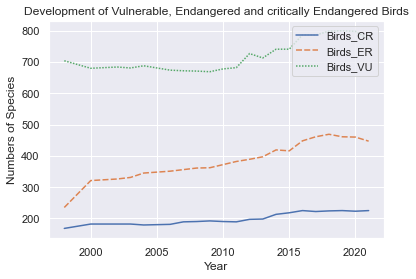

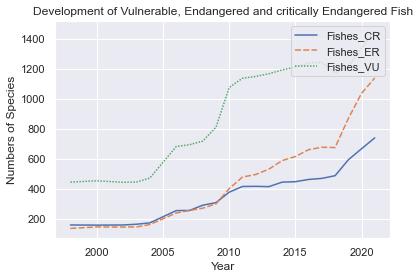

In [4]:
sns.lineplot(data=df_history_birds).set(title="Development of Vulnerable, Endangered and critically Endangered Birds")
plt.xlabel("Year")
plt.ylabel("Numbers of Species")
plt.legend(loc="upper right")
plt.show()

sns.lineplot(data=df_history_fish).set(title="Development of Vulnerable, Endangered and critically Endangered Fish")
plt.xlabel("Year")
plt.ylabel("Numbers of Species")
plt.legend(loc="upper right")
plt.show()

##### Interpretation of the Results:

These graphs illustrate how threatened birds and fish has evolved over time. Especially when looking at the fish data we can see, that the number of threatened fish has increased a lot over the last years. In Contrast to that, birds did not change so dramatically over time. But as mentioned in the description of the dataset, a higher number of threatened species could also be a result of assessing more species. Therefore we can't trust the numbers fully. But it is good to get a feeling of how the numbers are changing.

## Current numbers

Now let's take a closer look at the current numbers of endangered birds and fish. We have already seen how the numbers have evolved over time, regarding worldwide numbers. In this step we want to have a look at the relative numbers from the OECD and what the percentages of all birds an fish are endangered.

In [5]:
df = pd.read_csv("data/WILD_LIFE.csv")

In [6]:
df.head()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,380.0,NaN,NaN
1,TOT_KNOWN_IND,Total number of indigenous known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,353.0,NaN,NaN
2,ENDANGERED,Number of endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,38.0,NaN,NaN
3,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,10.0,NaN,NaN
4,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,59.0,NaN,NaN


At first we take a look at which species are contained in this dataset and what IUCN Categories are included. Afterwards we can concentrate on Birds and Fish.

In [7]:
df["Species"].unique()

array(['Mammals', 'Birds', 'Reptiles', 'Amphibians', 'Vascular plants',
       'Fish', 'Marine Fish', 'Freshwater Fish', 'Mosses', 'Lichens',
       'Invertebrates'], dtype=object)

In [8]:
df["IUCN"].unique()

array(['TOT_KNOWN', 'TOT_KNOWN_IND', 'ENDANGERED', 'CRITICAL',
       'VULNERABLE', 'THREATENED', 'ENDANGERED_IND', 'CRITICAL_IND',
       'VULNERABLE_IND', 'THREAT_PERCENT', 'THREATENED_IND',
       'IND_PERCENT'], dtype=object)

In [9]:
df["Country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'Chile', 'Estonia', 'Israel', 'Russia',
       'Slovenia', 'Luxembourg', 'Colombia', 'Latvia', 'Brazil',
       'Costa Rica', 'Lithuania'], dtype=object)

To be able to also compare it in a more regional way we want to ad which country is on which continent or area of a continent. 

In [10]:
df_continent = pd.read_csv("data/countryContinent.csv",  sep=',', encoding = 'unicode_escape')

In [11]:
df_continent.rename(columns={"code_3": "COU"}, inplace=True)
df_continent.head()

,country,code_2,COU,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [12]:
df_incl_continent = pd.merge(df, df_continent, on="COU")

In [13]:
df_incl_continent.head()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode Code,PowerCode,...,Flag Codes,Flags,country,code_2,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,...,NaN,NaN,Australia,AU,36,ISO 3166-2:AU,Oceania,Australia and New Zealand,9.0,53.0
1,TOT_KNOWN_IND,Total number of indigenous known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,...,NaN,NaN,Australia,AU,36,ISO 3166-2:AU,Oceania,Australia and New Zealand,9.0,53.0
2,ENDANGERED,Number of endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,...,NaN,NaN,Australia,AU,36,ISO 3166-2:AU,Oceania,Australia and New Zealand,9.0,53.0
3,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,...,NaN,NaN,Australia,AU,36,ISO 3166-2:AU,Oceania,Australia and New Zealand,9.0,53.0
4,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,...,NaN,NaN,Australia,AU,36,ISO 3166-2:AU,Oceania,Australia and New Zealand,9.0,53.0


In [14]:
# check if every Country was mapped
print("Count of unique Countries in the original dataset: {}".format(len(df["Country"].unique())))
print("Count of unique Countries in the original dataset: {}".format(len(df_incl_continent["Country"].unique())))

Count of unique Countries in the original dataset: 39
Count of unique Countries in the original dataset: 39


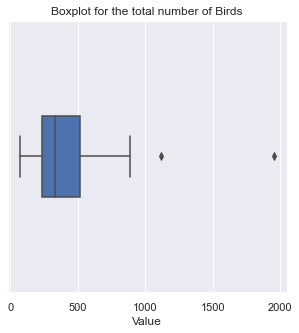

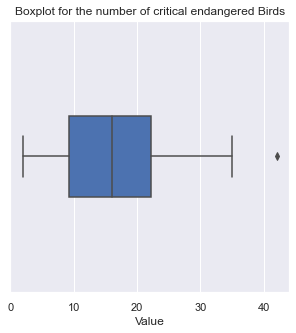

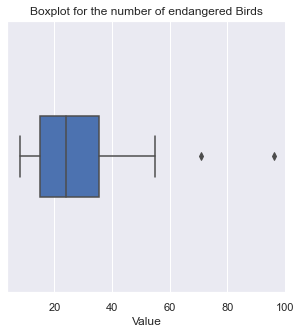

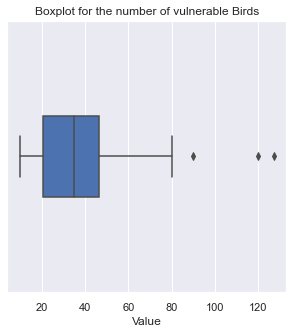

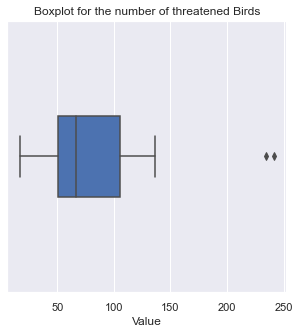

In [15]:
# Boxplots for Birds

plt.rcParams["figure.figsize"] = (5,5)
sns.boxplot(x=df_incl_continent[ (df_incl_continent.Species == 'Birds') & (df_incl_continent.IUCN == 'TOT_KNOWN')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the total number of Birds")
plt.show()

sns.boxplot(x=df_incl_continent[ (df_incl_continent.Species == 'Birds') & (df_incl_continent.IUCN == 'CRITICAL')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of critical endangered Birds")
plt.show()

sns.boxplot(x=df_incl_continent[ (df_incl_continent.Species == 'Birds') & (df_incl_continent.IUCN == 'ENDANGERED')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of endangered Birds")
plt.show()

sns.boxplot(x=df_incl_continent[ (df_incl_continent.Species == 'Birds') & (df_incl_continent.IUCN == 'VULNERABLE')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of vulnerable Birds")
plt.show()

sns.boxplot(x=df_incl_continent[ (df_incl_continent.Species == 'Birds') & (df_incl_continent.IUCN == 'THREATENED')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of threatened Birds")
plt.show()


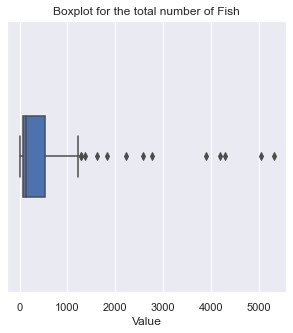

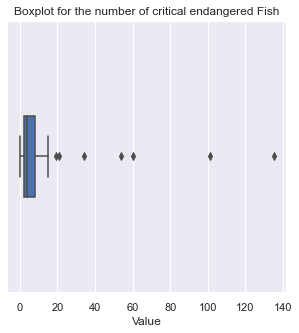

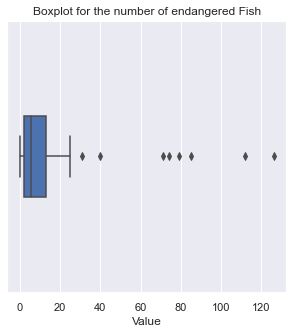

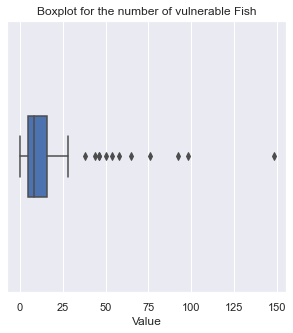

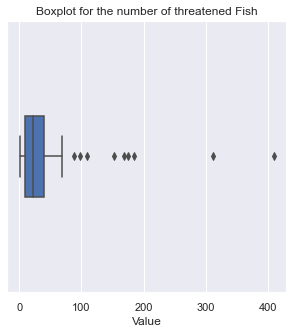

In [16]:
# Boxplots for Fish

plt.rcParams["figure.figsize"] = (5,5)
sns.boxplot(x=df_incl_continent[ ((df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')) & (df_incl_continent.IUCN == 'TOT_KNOWN')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the total number of Fish")
plt.show()

sns.boxplot(x=df_incl_continent[ ((df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')) & (df_incl_continent.IUCN == 'CRITICAL')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of critical endangered Fish")
plt.show()

sns.boxplot(x=df_incl_continent[ ((df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')) & (df_incl_continent.IUCN == 'ENDANGERED')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of endangered Fish")
plt.show()

sns.boxplot(x=df_incl_continent[ ((df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')) & (df_incl_continent.IUCN == 'VULNERABLE')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of vulnerable Fish")
plt.show()

sns.boxplot(x=df_incl_continent[ ((df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')) & (df_incl_continent.IUCN == 'THREATENED')]['Value'], width=0.3, saturation=1).set(title="Boxplot for the number of threatened Fish")
plt.show()

### Birds

#### per Continent

In [17]:
df_birds_continent = df_incl_continent[(df_incl_continent.Species == 'Birds')][['IUCN', 'Species', 'continent', 'Value']]
df_birds_continent = df_birds_continent.pivot_table(values='Value', index='continent', columns='IUCN', aggfunc='sum')
df_birds_continent['REST'] = df_birds_continent['TOT_KNOWN'] - df_birds_continent['CRITICAL'] - df_birds_continent['ENDANGERED']  - df_birds_continent['VULNERABLE'] - df_birds_continent['THREATENED']
df_birds_continent = df_birds_continent[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_birds_continent

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
continent,,,,,,
Americas,106.0,254.0,414.0,775.0,3594.0,5143.0
Asia,38.0,42.0,72.0,169.0,1412.0,1733.0
Europe,389.0,604.0,897.0,1954.0,4030.0,7874.0
Oceania,17.0,55.0,63.0,135.0,783.0,1053.0


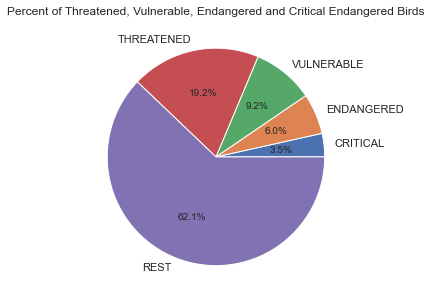

In [18]:
plt.rcParams["figure.figsize"] = (15,5)
df_birds_continent[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST']].sum().plot.pie(autopct="%.1f%%", title="Percent of Threatened, Vulnerable, Endangered and Critical Endangered Birds")
plt.ylabel(None)
plt.show()

In [19]:
def df_calculate_percentages(data):
    data_new = data.copy(deep=True)
    data_new['CRITICAL_PCT'] = data_new['CRITICAL']/data_new['TOT_KNOWN']
    data_new['ENDANGERED_PCT'] = data_new['ENDANGERED']/data_new['TOT_KNOWN']
    data_new['VULNERABLE_PCT'] = data_new['VULNERABLE']/data_new['TOT_KNOWN']
    data_new['THREATENED_PCT'] = data_new['THREATENED']/data_new['TOT_KNOWN']
    data_new['REST_PCT'] = data_new['REST']/data_new['TOT_KNOWN']
    data_new = data_new[['CRITICAL_PCT', 'ENDANGERED_PCT', 'VULNERABLE_PCT', 'THREATENED_PCT', 'REST_PCT']]
    return data_new

df_birds_continent_pct = df_calculate_percentages(df_birds_continent)

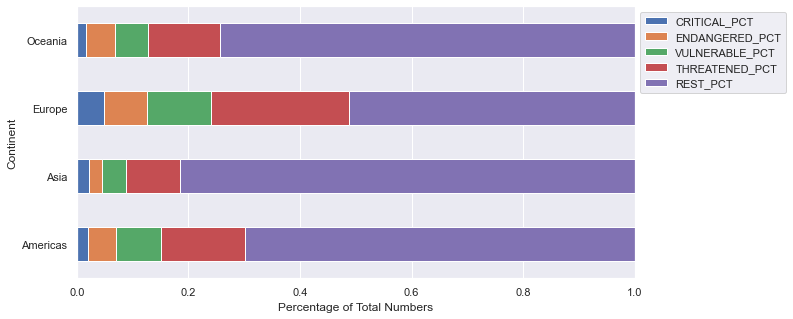

In [20]:
plt.rcParams["figure.figsize"] = (10,5)
df_birds_continent_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.ylabel("Continent")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

##### Interpretation:

Here we can see that the proportion of threatened birds is much higher in Europe than for example in Asia. Oceania (Australia) and America are in the mittle with their proportions. 

#### per Sub Region

In [21]:
df_birds_subregion = df_incl_continent[(df_incl_continent.Species == 'Birds')][['IUCN', 'Species', 'sub_region', 'Value']]
df_birds_subregion = df_birds_subregion.pivot_table(values='Value', index='sub_region', columns='IUCN', aggfunc='sum')
df_birds_subregion['REST'] = df_birds_subregion['TOT_KNOWN'] - df_birds_subregion['CRITICAL'] - df_birds_subregion['ENDANGERED']  - df_birds_subregion['VULNERABLE'] - df_birds_subregion['THREATENED']
df_birds_subregion = df_birds_subregion[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_birds_subregion

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
sub_region,,,,,,
Australia and New Zealand,17.0,55.0,63.0,135.0,783.0,1053.0
Central America,20.0,104.0,147.0,271.0,1463.0,2005.0
Eastern Asia,38.0,42.0,72.0,152.0,923.0,1227.0
Eastern Europe,84.0,87.0,107.0,335.0,529.0,1142.0
Northern America,26.0,14.0,48.0,88.0,498.0,674.0
Northern Europe,128.0,235.0,378.0,748.0,1520.0,3009.0
South America,60.0,136.0,219.0,416.0,1633.0,2464.0
Southern Europe,71.0,147.0,193.0,411.0,1310.0,2132.0
Western Europe,106.0,135.0,219.0,460.0,671.0,1591.0


In [22]:
df_birds_subregion_pct = df_calculate_percentages(df_birds_subregion)

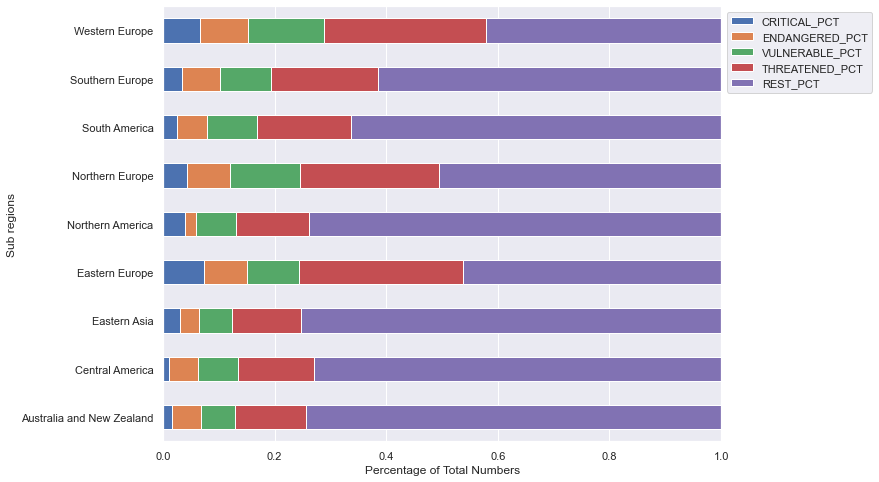

In [23]:
plt.rcParams["figure.figsize"] = (10,8)
df_birds_subregion_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.ylabel("Sub regions")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

##### Interpretation:

As we have seen before Europe is the continent with the highes proportion of threatened birds. Therefore we are now looking at sub regions. Here we see that Europe is now divided in Wester, Norther, Southern and Eastern Europe. Western, Northern and Eastern Europe are reflecting the Trend we saw above in Europe. In Contrast we see, that Southern Europe has a far lower proportion of endangered birds than the other sub regions in europe.

#### per Country

In [24]:
df_birds_country = df_incl_continent[(df_incl_continent.Species == 'Birds')][['IUCN', 'Species', 'Country', 'Value']]
df_birds_country = df_birds_country.pivot_table(values='Value', index='Country', columns='IUCN', aggfunc='sum')
df_birds_country['REST'] = df_birds_country['TOT_KNOWN'] - df_birds_country['CRITICAL'] - df_birds_country['ENDANGERED']  - df_birds_country['VULNERABLE'] - df_birds_country['THREATENED']
df_birds_country = df_birds_country[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_birds_country

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
Country,,,,,,
Australia,17.0,55.0,63.0,135.0,529.0,799.0
Austria,14.0,24.0,28.0,66.0,81.0,213.0
Belgium,20.0,15.0,20.0,55.0,88.0,198.0
Canada,26.0,14.0,48.0,88.0,498.0,674.0
Chile,2.0,25.0,19.0,46.0,418.0,510.0
Colombia,16.0,40.0,80.0,136.0,1682.0,1954.0
Costa Rica,2.0,8.0,20.0,30.0,828.0,888.0
Czech Republic,35.0,35.0,45.0,115.0,7.0,237.0
Denmark,24.0,15.0,45.0,84.0,73.0,241.0


In [25]:
df_birds_country_pct = df_calculate_percentages(df_birds_country)

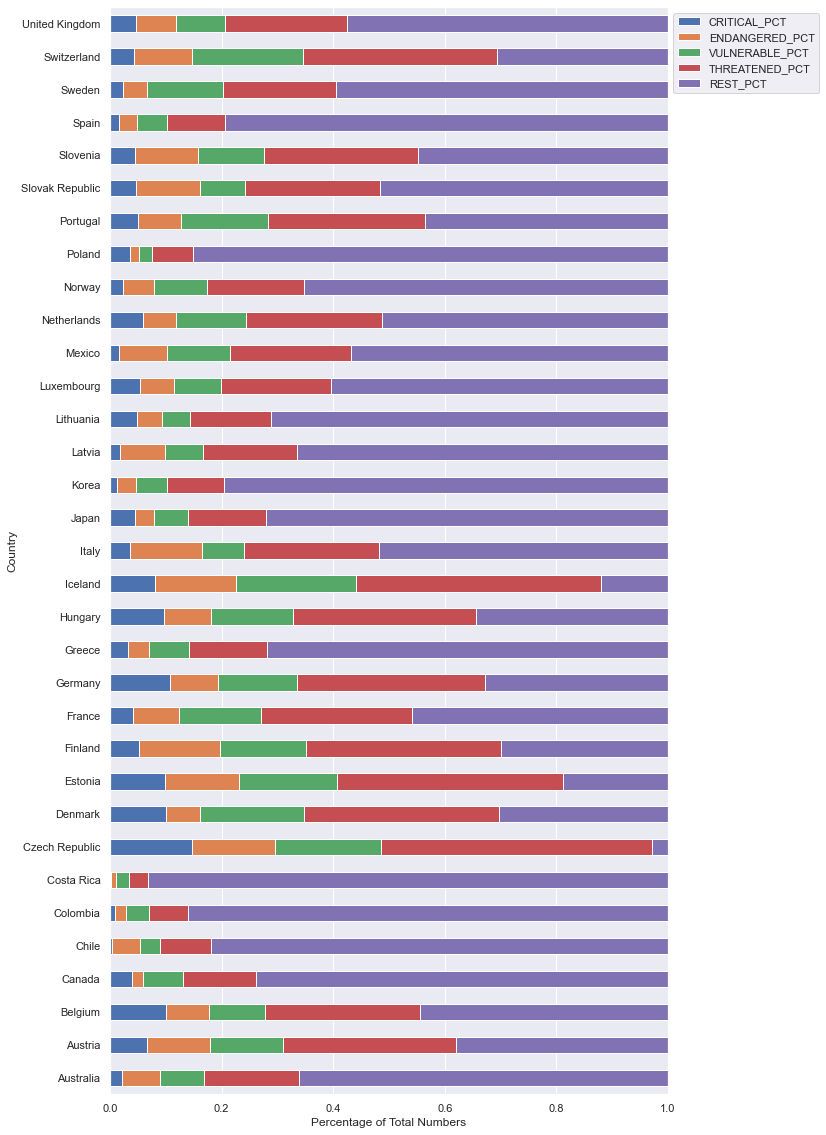

In [26]:
plt.rcParams["figure.figsize"] = (10,20)
df_birds_country_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.ylabel("Country")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

##### Interpretation of the Results:

Looking at the results in a more detailed way, based on countries confirms that. The countries with the highes proportions of threatened birds are Czech Republic, Iceland and Estonia. You can also see the trend that the countries with the highest proportions of threatened birds are in Europe.

### Fish

#### per Continent

In [27]:
df_fish_continent = df_incl_continent[(df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')][['IUCN', 'Species', 'continent', 'Value']]
df_fish_continent = df_fish_continent.pivot_table(values='Value', index='continent', columns='IUCN', aggfunc='sum')
df_fish_continent['REST'] = df_fish_continent['TOT_KNOWN'] - df_fish_continent['CRITICAL'] - df_fish_continent['ENDANGERED']  - df_fish_continent['VULNERABLE'] - df_fish_continent['THREATENED']
df_fish_continent = df_fish_continent[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_fish_continent

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
continent,,,,,,
Americas,328.0,532.0,780.0,1640.0,17709.0,20989.0
Asia,128.0,184.0,106.0,418.0,11942.0,12778.0
Europe,272.0,337.0,472.0,1191.0,8840.0,11112.0
Oceania,14.0,38.0,48.0,100.0,11109.0,11309.0


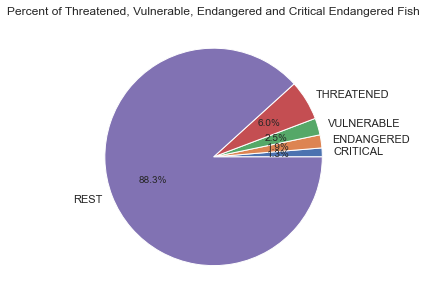

In [28]:
plt.rcParams["figure.figsize"] = (15,5)
df_fish_continent[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST']].sum().plot.pie(autopct="%.1f%%", title="Percent of Threatened, Vulnerable, Endangered and Critical Endangered Fish")
plt.ylabel(None)
plt.show()

In [29]:
df_fish_continent_pct = df_calculate_percentages(df_fish_continent)

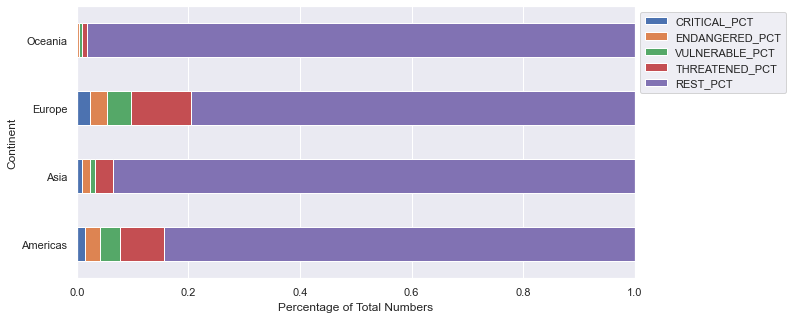

In [30]:
plt.rcParams["figure.figsize"] = (10,5)
df_fish_continent_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.ylabel("Continent")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

##### Interpretation:

Here we see, that the highest proportion of endangered fish is in Europe, followed by America.

#### per Sub Region

In [31]:
df_fish_rubregion = df_incl_continent[(df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')][['IUCN', 'Species', 'sub_region', 'Value']]
df_fish_rubregion = df_fish_rubregion.pivot_table(values='Value', index='sub_region', columns='IUCN', aggfunc='sum')
df_fish_rubregion['REST'] = df_fish_rubregion['TOT_KNOWN'] - df_fish_rubregion['CRITICAL'] - df_fish_rubregion['ENDANGERED']  - df_fish_rubregion['VULNERABLE'] - df_fish_rubregion['THREATENED']
df_fish_rubregion = df_fish_rubregion[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_fish_rubregion

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
sub_region,,,,,,
Australia and New Zealand,14.0,38.0,48.0,100.0,11109.0,11309.0
Central America,28.0,169.0,201.0,398.0,6531.0,7327.0
Eastern Asia,128.0,184.0,106.0,418.0,10344.0,11180.0
Eastern Europe,38.0,19.0,49.0,216.0,356.0,678.0
Northern America,18.0,50.0,108.0,176.0,2400.0,2752.0
Northern Europe,46.0,38.0,61.0,145.0,3037.0,3327.0
South America,282.0,313.0,471.0,1066.0,8778.0,10910.0
Southern Europe,106.0,164.0,156.0,426.0,4663.0,5515.0
Western Europe,82.0,116.0,206.0,404.0,784.0,1592.0


In [32]:
df_fish_subregion_pct = df_calculate_percentages(df_fish_rubregion)

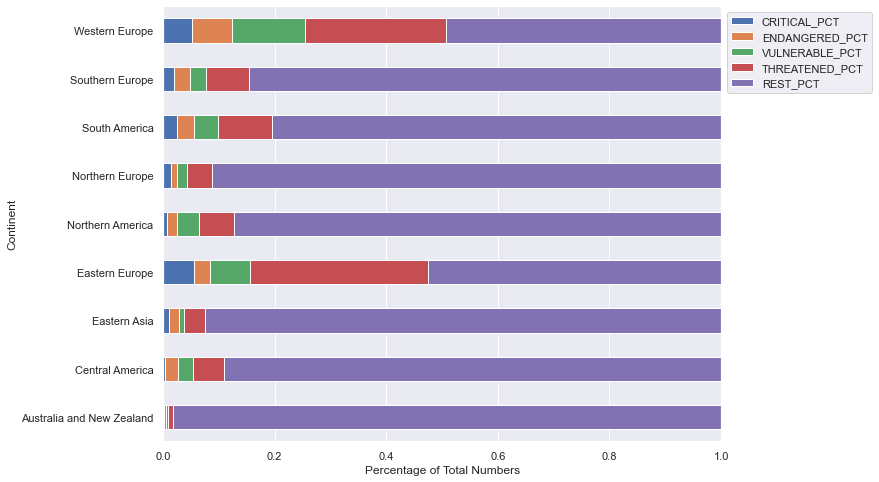

In [33]:
plt.rcParams["figure.figsize"] = (10,8)
df_fish_subregion_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.ylabel("Continent")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

##### Interpretation:

Regarding the result from above, we see that the proportion of endangered fish in Europe is driven by Western and Eastern Europe.

#### per Country

In [34]:
df_fish_country = df_incl_continent[(df_incl_continent.Species == 'Fish') | (df_incl_continent.Species == 'Marine Fish') | (df_incl_continent.Species == 'Freshwater Fish')][['IUCN', 'Species', 'Country', 'Value']]
df_fish_country = df_fish_country.pivot_table(values='Value', index='Country', columns='IUCN', aggfunc='sum')
df_fish_country['REST'] = df_fish_country['TOT_KNOWN'] - df_fish_country['CRITICAL'] - df_fish_country['ENDANGERED']  - df_fish_country['VULNERABLE'] - df_fish_country['THREATENED']
df_fish_country = df_fish_country[['CRITICAL', 'ENDANGERED', 'VULNERABLE', 'THREATENED', 'REST', 'TOT_KNOWN']].dropna()

df_fish_country

IUCN,CRITICAL,ENDANGERED,VULNERABLE,THREATENED,REST,TOT_KNOWN
Country,,,,,,
Australia,14.0,38.0,48.0,100.0,10531.0,10731.0
Austria,12.0,36.0,30.0,78.0,12.0,168.0
Belgium,6.0,8.0,44.0,58.0,168.0,284.0
Canada,18.0,50.0,108.0,176.0,2400.0,2752.0
Chile,2.0,46.0,28.0,76.0,2374.0,2526.0
Colombia,10.0,15.0,147.0,172.0,8040.0,8384.0
Costa Rica,1.0,9.0,58.0,68.0,1699.0,1835.0
Czech Republic,30.0,4.0,16.0,50.0,98.0,198.0
Denmark,5.0,3.0,8.0,16.0,261.0,293.0


In [35]:
df_fish_country_pct = df_calculate_percentages(df_fish_country)

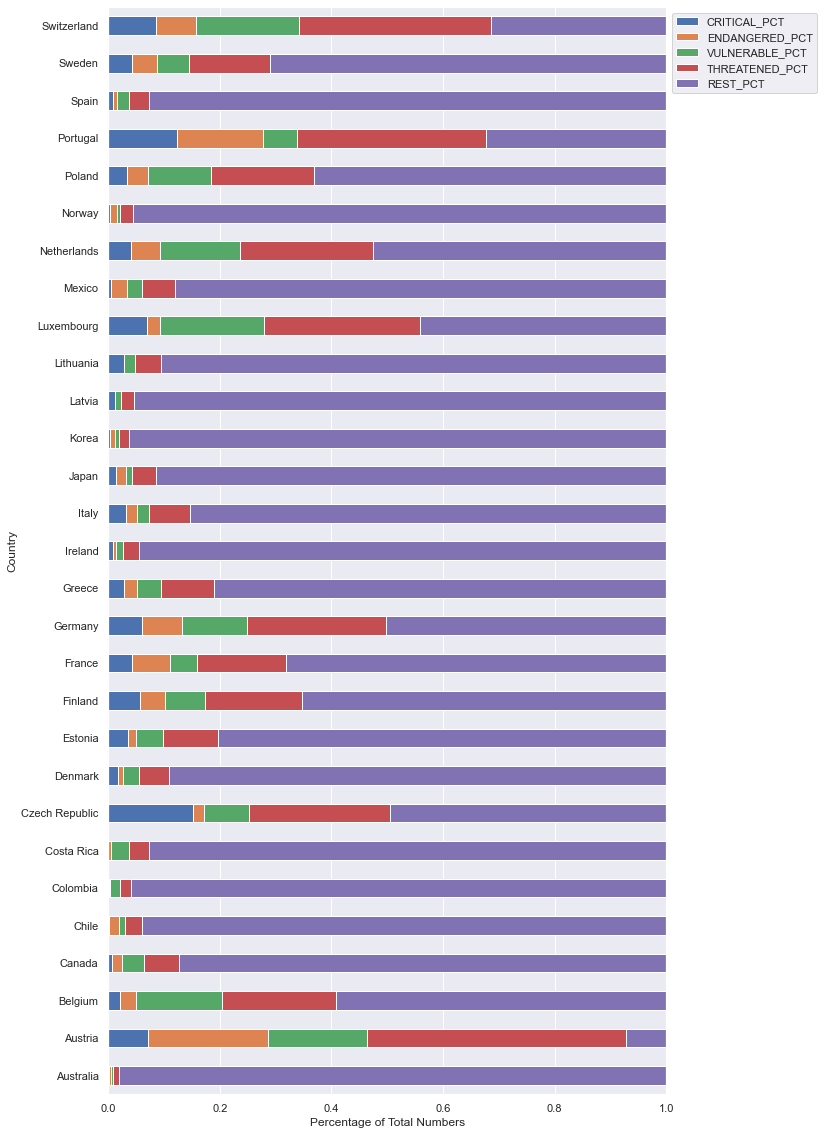

In [36]:
plt.rcParams["figure.figsize"] = (10,20)
df_fish_country_pct.plot.barh(alpha=1, stacked=True, rot=0)
plt.ylabel("Country")
plt.xlabel("Percentage of Total Numbers")
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

##### Interpretation:

Interesting to see is, that the Country with the highest proportion of endangered Fish is Austria, followed by Switzerland and Portugal. The total number of known fish in Austria is just 168, so if one species is endangered or threatened it will turn out in a higher proportion than in a country like Japan.

### Conclusion

#### Question 1: 
How has the population of endangered birds and fish has evolved over time and what are the current numbers in different regions?

#### Answer:
The population of endangered birds and fish have both inreased in the last years, but it is difficult to say how much of this effect is due to the assessment of new species. Therefore we can't say for sure by how much the number of endangered species has changed, but that the number is increasing. In addition we can say that the increase is higher for fish than for birds.

The current proportion of endangered and threatened fish and birds to their total number in different reagions turned out in the fact, that the proportion is higher in Europe. Other continents have a lower proportion of endangered and threatened fish and birds. Especially in Western and Eastern Europe the proportion of endangered and threatened birds and fish are about 50%.

But as different countries are reporting their numbers of endangered specias in a different way we can not rely fully on these results.


# Question 2: Which geographical, natural and environmental characteristics predict a higherpercentage of endangered birds and fish in a country?

To gather the information needed to answer this question, we use seven datasets, that cover the following topics.

##### Dataset GREEN_GROWTH.csv
https://stats.oecd.org/Index.aspx?DataSetCode=GREEN_GROWTH

The OECD Green Growth database contains selected indicators for monitoring progress towards green growth to support policy making and inform the public at large. The conceptual framework is structured around four groups to capture the main features of green growth:

**Environmental and resource productivity:** indicate whether economic growth is becoming greener with more efficient use of natural capital and to capture aspects of production which are rarely quantified in economic models and accounting frameworks;

**The natural asset base:** indicate the risks to growth from a declining natural asset base;

**Environmental dimension of quality of life:** indicate how environmental conditions affect the quality of life and wellbeing of people;

**Economic opportunities and policy responses:** indicate the effectiveness of policies in delivering green growth and describe the societal responses needed to secure business and employment opportunities.


##### Dataset LAND_COVER.csv
https://stats.oecd.org/Index.aspx?DataSetCode=LAND_COVER

Loss of biodiversity and pressures on ecosystem services are among the most pressing global environmental challenges. Changes in land cover and land use are the leading contributors to terrestrial biodiversity loss.
This multi-class dataset allows for analysis of changes in land cover consistently at the global scale. It builds on decades of Earth observation missions by different national and supranational space organisations.
Loss of natural and semi-natural vegetated land is presented as a proxy for pressures on biodiversity and ecosystems. The indicator is defined as the percentage of tree cover, grassland, wetland, shrubland and sparse vegetation converted to any other land cover type. Gains of natural and semi-natural vegetated land are conversions in the opposite direction. 


##### Dataset LAND_USE.csv
https://stats.oecd.org/Index.aspx?DataSetCode=LAND_USE

Land resources are one of the four components of the natural environment: water, air, land and living resources. In this context land is both a physical "milieu" necessary for the development of natural vegetation as well as cultivated vegetation and a resource for human activities.
The data presented here give information concerning land use state and changes (e.g. agricultural land, forest land).


##### Dataset OCEAN.csv
https://stats.oecd.org/Index.aspx?DataSetCode=OCEAN

The ocean is a shared global resource. Ocean-related industries in many countries have expanded with insufficient consideration for the environment, risking the natural resources and the essential marine ecosystem services on which economies and people’s well-being depend.
The OECD Sustainable Ocean Economy Database synthesizes available ocean-related datasets and indicators from across the Organisation to improve their discoverability and comparability. 
The database structure follows the OECD’s Green Growth indicators framework. 
Indicators for the following main themes are provided:
1.	Natural capital of the ocean
2.	Environmental dimension of wellbeing and resilience in coastal communities
3.	Environmental and resource productivity of the ocean economy
4.	Economic opportunities from pursuing ocean sustainability
5.	Policy responses directed at ocean sustainability
6.	The socio-economic context


##### Dataset PROTECTED_AREAS.csv
https://stats.oecd.org/Index.aspx?DataSetCode=PROTECTED_AREAS  

This dataset answers the questions: how extensive are protected areas and what management objectives are pursued via protected area designation?
It includes country-level protected area coverage for terrestrial, marine and coastal domains calculated from the World Database on Protected Areas (WDPA) and provides disaggregations of protected area totals by IUCN management objective.


##### Dataset WATER_RESOURCES.csv
https://stats.oecd.org/Index.aspx?DataSetCode=WATER_RESOURCES

This dataset provides detailed statistics for several natural parameters of freshwater resources by long term annual average (with the shortest obersvation period being ten years in Belgium). These provide us with some information on meteorological and geographical data regarding water resources that we may use to build a clustering model.


In [37]:
# load all datasets
df_animal = pd.read_csv("data/WILD_LIFE.csv",  sep=',', encoding = 'unicode_escape')
df_green = pd.read_csv("data/GREEN_GROWTH.csv", sep=',', encoding = 'unicode_escape')
df_land_cover = pd.read_csv("data/LAND_COVER.csv", sep=',', encoding = 'unicode_escape')
df_land_use = pd.read_csv("data/LAND_USE.csv", sep=',', encoding = 'unicode_escape')
df_ocean= pd.read_csv("data/OCEAN.csv", sep=',', encoding = 'unicode_escape')
df_protected = pd.read_csv("data/PROTECTED_AREAS.csv", sep=',', encoding = 'unicode_escape')
df_water = pd.read_csv("data/WATER_RESOURCES.csv", sep=',', encoding = 'unicode_escape')

In [38]:
# reduce to countries where species information is available
countries = df_animal["Country"].unique()
df_green = df_green[df_green["Country"].isin(countries)]
df_land_use = df_land_use[df_land_use["Country"].isin(countries)]
df_land_cover = df_land_cover[df_land_cover["Country"].isin(countries)]
df_ocean = df_ocean[df_ocean["Country"].isin(countries)]
df_protected = df_protected[df_protected["Country"].isin(countries)]
df_water = df_water[df_water["Country"].isin(countries)]

In [39]:
# use only most recent information of each criteria (if some values are missing use cubic extrapolation to fill up)
# Green growth
green_data = []
variables = df_green["VAR"].unique()
for var in variables:
    max_year = df_green["Year"][df_green["VAR"] == var].max()
    for country in countries:
        temp = df_green[["Year","Value"]][(df_green["VAR"] == var) & (df_green["Country"] == country)]
        if(max_year > temp["Year"].max()):
            temp = temp.append({'Year':max_year, 'Value':np.nan}, ignore_index = True)
            temp["Year"] = temp["Year"].astype(int)
            temp = temp.set_index("Year")
            def func(x, a, b, c, d):
                return(a * (x**3) + b * (x**2) + c * x + d)
            guess = (0.5,0.5,0.5,0.5)
            fit_df = temp.dropna()
            col_params = {}
            for col in fit_df.columns:
                # Get x & y
                x = fit_df.index.astype(float).values
                y = fit_df[col].values
                # Curve fit column and get curve parameters
                params = curve_fit(func, x, y, guess)
                # Store optimized parameters
                col_params[col] = params[0]
            for col in temp.columns:
                # Get the index values for NaNs in the column
                x = temp[temp.isnull()].index.astype(float).values
                # Extrapolate those points with the fitted function
                temp[col][x] = func(x, *col_params[col])
            # get last entry
        value = temp.iloc[-1]["Value"]
        green_data.append([max_year, country, var, value])

C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [40]:
# land cover (we only use percent of total country area)
land_cover_data = []
variables = df_land_cover["VARIABLE"][df_land_cover["MEAS"] == "PCNT"].unique()
df_land_cover = df_land_cover[df_land_cover["MEAS"] == "PCNT"]
for var in variables:
    max_year = 2019
    for country in countries:
        temp = df_land_cover[["Year","Value"]][(df_land_cover["VARIABLE"]==var)&(df_land_cover["Country"]==country)]
        temp = temp.set_index("Year")
        value = temp.iloc[-1]["Value"]
        land_cover_data.append([max_year, country, var, value])

In [41]:
# land use (again we only take the percentages into account)
land_use_data = []
df_land_use = df_land_use[df_land_use["Unit"] == "Percentage"]
variables = df_land_use['VAR'].unique()
for var in variables:
    max_year = 2019
    for country in countries:
        temp = df_land_use[["Year","Value"]][(df_land_use["VAR"]==var)&(df_land_use["Country"]==country)]
        temp = temp.set_index("Year")
        if(len(temp) != 0):
            value = temp.iloc[-1]["Value"]
        else:
            value = np.nan
        land_use_data.append([max_year, country, var, value])

In [42]:
# protected area
protected_data = []
for country in countries:
    max_year = df_protected["Year"][df_protected["Country"]==country].max()
    temp = df_protected[["Year","Value"]][(df_protected["Country"]==country)]
    temp = temp.set_index("Year")
    if(len(temp) != 0):
        value = temp.iloc[-1]["Value"]
    else:
        value = np.nan
    protected_data.append([max_year, country, 'Percent of protected area', value])

In [43]:
# ocean
ocean_data = []
variables = df_ocean["VARIABLE"].unique()
for var in variables:
    for country in countries:
        max_year = df_ocean["Year"][df_ocean["Country"]==country].max()
        temp = df_ocean[["Year","Value"]][(df_ocean["Country"]==country)]
        temp = temp.set_index("Year")
        if(len(temp) != 0):
            value = temp.iloc[-1]["Value"]
        else:
            value = np.nan
        ocean_data.append([max_year, country, var, value])

In [44]:
# freshwater resources
water_data = []
variables = df_water["VAR"].unique()
for var in variables:
    for country in countries:
        max_year = df_water["Year"][df_water["Country"]==country].max()
        temp = df_water[["Value"]][(df_water["Country"]==country)]
        if(len(temp) != 0):
            value = temp.iloc[-1]["Value"]
        else:
            value = np.nan
        # the data is given as a long term average, for easier merging we append the current year
        water_data.append([2022, country, var, value])

In [45]:
# wildlife data
def wildlife_data_gen(orig_df: pd.DataFrame, year: int):
    output_data = []
    df_reduced = orig_df.reset_index()
    variables = df_reduced.columns[1:]
    countries = df_reduced["Country"].unique()
    df_reduced = df_reduced.loc[df_reduced["Country"].isin(countries)]
    
    for var in variables:
        for country in countries:
            temp = df_reduced[[var]][(df_reduced["Country"]==country)]
            if(len(temp) != 0):
                value = temp.iloc[-1][var]
            else:
                value = np.nan
            output_data.append([year, country, var, value])
    return output_data

# as mentioned in task 1, the data from WILD_LIFE.csv used is from 2021
bird_data = wildlife_data_gen(df_birds_country, 2021)
fish_data = wildlife_data_gen(df_fish_country, 2021)

In [46]:
def data_merger(orig_list: list, countries: list):
    output_df = pd.DataFrame()
    variables = list({line[2] for line in orig_list})
    output_df = pd.DataFrame(index = [countries], columns = [variables])
    for line in orig_list:
        output_df.at[str(line[1]), str(line[2])] = line[3]
    return output_df

Next, we will create the dataframes used for the next several operations. For this, we are first going to check if our data on fishes and birds is consistent on which countries are represented. This makes it easier for us to immediately dump countries that lack endangerment data.

In [47]:
countries_bird = list({line[1] for line in bird_data}) 
countries_fish = list({line[1] for line in fish_data})

if countries_bird == countries_fish:
    print("Fish and Bird data contain same countries.")
else:
    print("Fish and Bird data do not contain the same countries.")

Fish and Bird data do not contain the same countries.


In [48]:
# both datasets do not contain information on the same countries, hence we use different lists for both cycles.    
# now, we merge all the data
data_list = [water_data, ocean_data, protected_data, land_use_data, land_cover_data, green_data]

data_dfs_fish = [data_merger(data, countries_fish) for data in data_list]
data_dfs_bird = [data_merger(data, countries_bird) for data in data_list]

df_fish = data_merger(fish_data, countries_fish)
df_bird = data_merger(bird_data, countries_bird)

For now, we are going to create a dataframe holding every variable.

In [49]:
def df_full_gen(orig_df: pd.DataFrame, dfs: list):
    output = orig_df
    for df_name in dfs:
        output = output.join(df_name)
    return output

df_fish_full = df_full_gen(df_fish, data_dfs_fish).sort_index()
df_bird_full = df_full_gen(df_bird, data_dfs_bird).sort_index()

In [50]:
display(df_fish_full.head())
display(df_bird_full.head())

,THREATENED,CRITICAL,ENDANGERED,REST,VULNERABLE,TOT_KNOWN,OUT_SEA_RESOU,GROUND_RESOU,OUT_NEI_RESOU,FRESH_95_RESOU,...,SPARSE_VEGETATION,CROPL,WETL,GRSL,PM_PWM,CO2_PBPROD,GPAT_DE_AT,EAMFP_EAMFPG,LCC_NATGAIN92,DMC_PROD
Australia,100,14,38,10531,48,10731,407.676,407.676,407.676,407.676,...,35.5194,8.17845,1.30339,16.9654,6.7487,3.13508,9.06,1.97496,0.971938,1.65556
Austria,78,12,36,12,30,168,86,86,86,86,...,1.40666,22.9326,0.150062,15.3951,12.2249,7.66453,13.58,0.174061,1.76555,3.26553
Belgium,58,6,8,168,44,284,25.7646,25.7646,25.7646,25.7646,...,0.0111033,50.5799,0.333099,14.5875,12.7263,6.2469,10.45,0.499876,2.5269,5.08026
Canada,176,18,50,2400,108,2752,3478,3478,3478,3478,...,23.2638,5.78259,0.824262,2.48062,7.09026,3.13414,10.27,0.950586,0.309103,1.92356
Chile,76,2,46,2374,28,2526,1007.49,1007.49,1007.49,1007.49,...,16.9324,6.61623,0.0413074,4.47095,23.6832,5.19292,19.45,-0.0957566,2.56074,0.62649


,THREATENED,CRITICAL,ENDANGERED,REST,VULNERABLE,TOT_KNOWN,OUT_SEA_RESOU,GROUND_RESOU,OUT_NEI_RESOU,FRESH_95_RESOU,...,SPARSE_VEGETATION,CROPL,WETL,GRSL,PM_PWM,CO2_PBPROD,GPAT_DE_AT,EAMFP_EAMFPG,LCC_NATGAIN92,DMC_PROD
Australia,135,17,55,529,63,799,407.676,407.676,407.676,407.676,...,35.5194,8.17845,1.30339,16.9654,6.7487,3.13508,9.06,1.97496,0.971938,1.65556
Austria,66,14,24,81,28,213,86,86,86,86,...,1.40666,22.9326,0.150062,15.3951,12.2249,7.66453,13.58,0.174061,1.76555,3.26553
Belgium,55,20,15,88,20,198,25.7646,25.7646,25.7646,25.7646,...,0.0111033,50.5799,0.333099,14.5875,12.7263,6.2469,10.45,0.499876,2.5269,5.08026
Canada,88,26,14,498,48,674,3478,3478,3478,3478,...,23.2638,5.78259,0.824262,2.48062,7.09026,3.13414,10.27,0.950586,0.309103,1.92356
Chile,46,2,25,418,19,510,1007.49,1007.49,1007.49,1007.49,...,16.9324,6.61623,0.0413074,4.47095,23.6832,5.19292,19.45,-0.0957566,2.56074,0.62649


In [51]:
# create a dictionary of parameters that is more easy to read
def var_dict_gen(orig_df: pd.DataFrame, var_short: str, var_long: str):
    var_s = orig_df[var_short].unique()
    var_l = orig_df[var_long].unique()
    return {var_1: var_2 for var_1, var_2 in zip(var_s, var_l)}

land_cover_dict = var_dict_gen(df_land_cover, "VARIABLE", "Land cover class")
green_dict = var_dict_gen(df_green, "VAR", "Variable")
land_use_dict = var_dict_gen(df_land_use, "VAR", "Variable")
water_dict = var_dict_gen(df_water, "VAR", "Variable")
ocean_dict = var_dict_gen(df_ocean, "VARIABLE", "Variable")
protected_dict = {"Percent of protected area": "Percent of protected area"}

var_dict = {**land_cover_dict, **green_dict, **land_use_dict, **water_dict, **ocean_dict, **protected_dict}

display(var_dict)

{'URBAN': 'Artificial surfaces',
 'WATER': 'Inland water',
 'BARE': 'Bare area',
 'FOREST': 'Tree cover',
 'SHRUBL': 'Shrubland',
 'SPARSE_VEGETATION': 'Sparse vegetation',
 'CROPL': 'Cropland',
 'WETL': 'Wetland',
 'GRSL': 'Grassland',
 'CO2_PBPROD': 'Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions',
 'GPAT_DE_AT': 'Development of environment-related technologies, % all technologies',
 'DMC_PROD': 'Non-energy material productivity, GDP per unit of DMC',
 'PM_PWM': 'Mean population exposure to PM2.5',
 'EAMFP_EAMFPG': 'Environmentally adjusted multifactor productivity growth',
 'LCC_NATGAIN92': 'Gain of natural and semi-natural vegetated land, % since 1992',
 'OTHER_P': 'Other % land area',
 'ARABLE_P': 'Arable and cropland % land area',
 'MEAD_P': 'Meadows and pastures % land area',
 'FOREST_P': 'Forest % land area',
 'EVAP_RESOU': 'Evapotranspiration',
 'INTERN_RESOU': 'Internal resources',
 'OUT_RESOU': 'Outflow total',
 'PREC_RESOU': 'Precipitation',

In [52]:
df_bird = df_animal[df_animal['Species'] == "Birds"]
df_fish = df_animal[df_animal['Species'] == "Fish"]